In [7]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import itertools
import pyarrow.parquet as pq
import pathlib

sys.path.append("..")
from utils.utils import df_stats, plot_features_all_cluster

In [8]:
path = pathlib.Path("../../Extracted_Features_(CSV_files)/feature_df_sc_norm.parquet")
df = pq.read_table(path).to_pandas()

In [9]:
df

,Metadata_cell_type,Metadata_Well,Metadata_number_of_singlecells,Metadata_incubation inducer (h),Metadata_inhibitor,Metadata_inhibitor_concentration,Metadata_inhibitor_concentration_unit,Metadata_inducer1,Metadata_inducer1_concentration,Metadata_inducer1_concentration_unit,...,Nuclei_Texture_Variance_CorrPM_3_00_256,Nuclei_Texture_Variance_CorrPM_3_01_256,Nuclei_Texture_Variance_CorrPM_3_02_256,Nuclei_Texture_Variance_CorrPM_3_03_256,Metadata_Treatment,Metadata_Dose,oneb_Metadata_Treatment_Dose_Inhibitor_Dose,twob_Metadata_Treatment_Dose_Inhibitor_Dose,threeb_Metadata_Treatment_Dose_Inhibitor_Dose,fourb_Metadata_Treatment_Dose_Inhibitor_Dose
0,SH-SY5Y,B13,3765,6,Media ctr,0.0,None,media ctr,0.0,None,...,0.099225,0.096054,0.110432,0.107764,media ctr,0,media ctr_0_Media ctr_0.0,media ctr_Media ctr_0.0__0,media ctr__0__Media ctr_0.0,media ctr__0__Media ctr__0.0
1,SH-SY5Y,B13,3765,6,Media ctr,0.0,None,media ctr,0.0,None,...,0.020683,0.016122,0.012990,0.013631,media ctr,0,media ctr_0_Media ctr_0.0,media ctr_Media ctr_0.0__0,media ctr__0__Media ctr_0.0,media ctr__0__Media ctr__0.0
2,SH-SY5Y,B13,3765,6,Media ctr,0.0,None,media ctr,0.0,None,...,0.027519,0.045982,0.037653,0.017281,media ctr,0,media ctr_0_Media ctr_0.0,media ctr_Media ctr_0.0__0,media ctr__0__Media ctr_0.0,media ctr__0__Media ctr__0.0
3,SH-SY5Y,B13,3765,6,Media ctr,0.0,None,media ctr,0.0,None,...,-0.002945,0.000293,0.008048,-0.002151,media ctr,0,media ctr_0_Media ctr_0.0,media ctr_Media ctr_0.0__0,media ctr__0__Media ctr_0.0,media ctr__0__Media ctr__0.0
4,SH-SY5Y,B13,3765,6,Media ctr,0.0,None,media ctr,0.0,None,...,0.016846,0.006499,0.014114,0.026206,media ctr,0,media ctr_0_Media ctr_0.0,media ctr_Media ctr_0.0__0,media ctr__0__Media ctr_0.0,media ctr__0__Media ctr__0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597897,SH-SY5Y,O23,3555,6,Media ctr,0.0,None,media ctr,0.0,None,...,-0.024370,-0.033577,-0.033811,-0.028148,media ctr,0,media ctr_0_Media ctr_0.0,media ctr_Media ctr_0.0__0,media ctr__0__Media ctr_0.0,media ctr__0__Media ctr__0.0
597898,SH-SY5Y,O23,3555,6,Media ctr,0.0,None,media ctr,0.0,None,...,-0.049855,-0.048752,-0.050176,-0.049417,media ctr,0,media ctr_0_Media ctr_0.0,media ctr_Media ctr_0.0__0,media ctr__0__Media ctr_0.0,media ctr__0__Media ctr__0.0
597899,SH-SY5Y,O23,3555,6,Media ctr,0.0,None,media ctr,0.0,None,...,-0.027676,-0.024066,-0.026279,-0.027050,media ctr,0,media ctr_0_Media ctr_0.0,media ctr_Media ctr_0.0__0,media ctr__0__Media ctr_0.0,media ctr__0__Media ctr__0.0
597900,SH-SY5Y,O23,3555,6,Media ctr,0.0,None,media ctr,0.0,None,...,0.308702,0.309290,0.311365,0.309627,media ctr,0,media ctr_0_Media ctr_0.0,media ctr_Media ctr_0.0__0,media ctr__0__Media ctr_0.0,media ctr__0__Media ctr__0.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'media ctr'),
  Text(1, 0, 'DMSO'),
  Text(2, 0, 'Thapsigargin'),
  Text(3, 0, 'Topotecan'),
  Text(4, 0, 'LPS'),
  Text(5, 0, 'LPS_Nigericin'),
  Text(6, 0, 'Disulfiram'),
  Text(7, 0, 'H2O2'),
  Text(8, 0, 'Flagellin')])

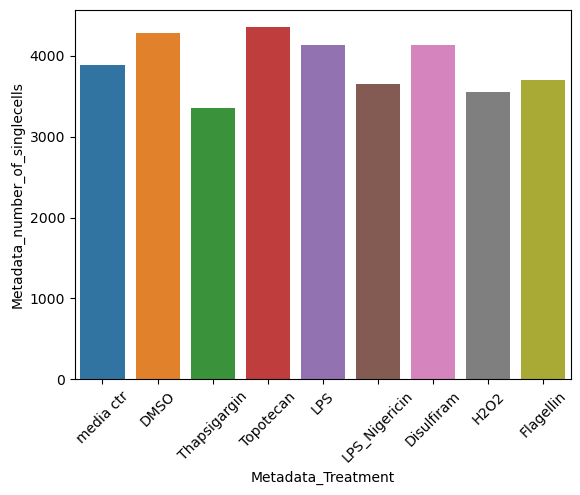

In [22]:
sns.barplot(
    x="Metadata_Treatment",
    y="Metadata_number_of_singlecells",
    estimator=np.median,
    data=df,
    errorbar=("ci", 95),
)
plt.xticks(rotation=45)

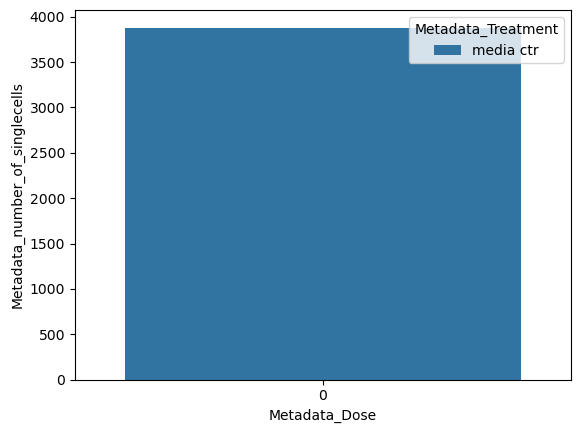

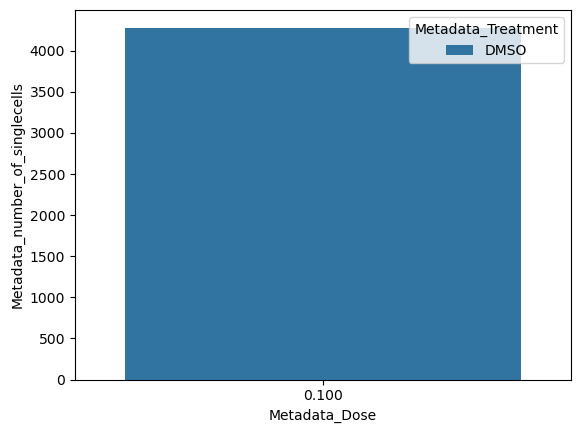

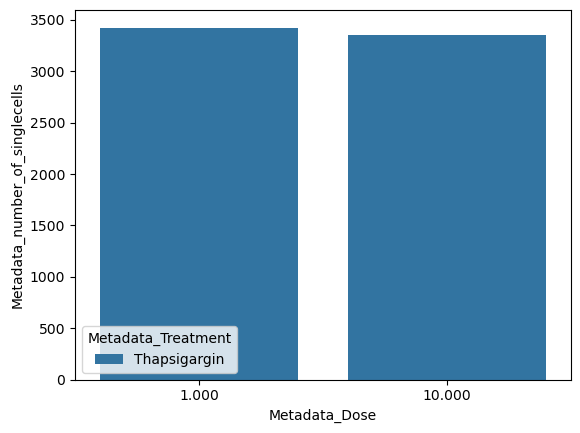

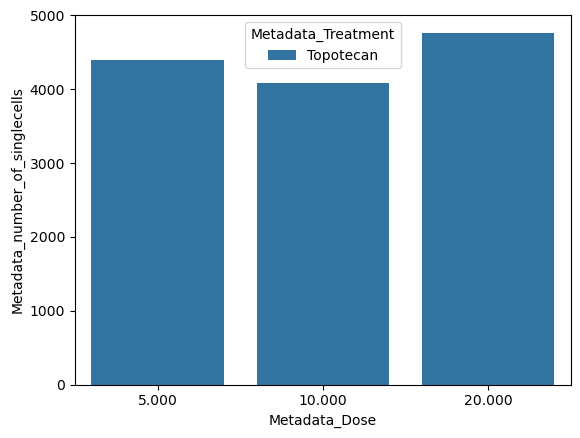

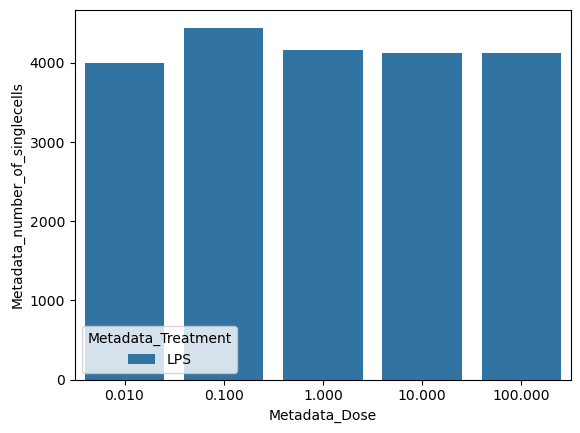

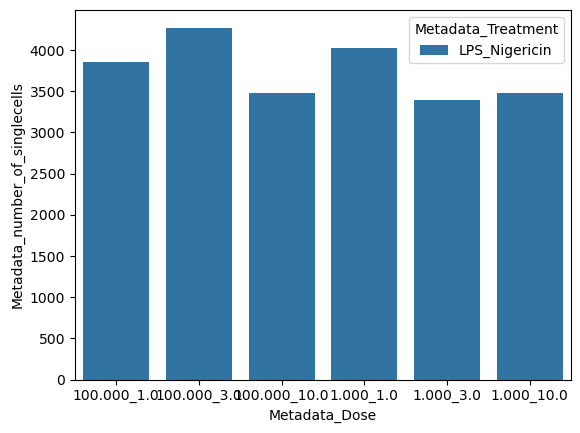

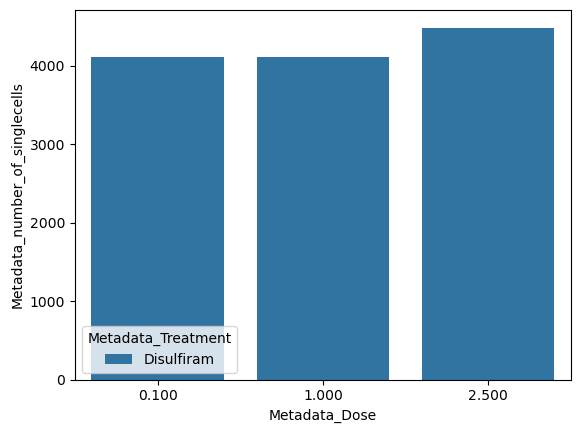

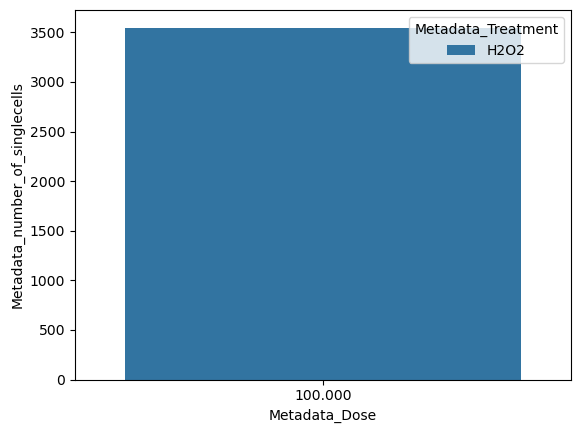

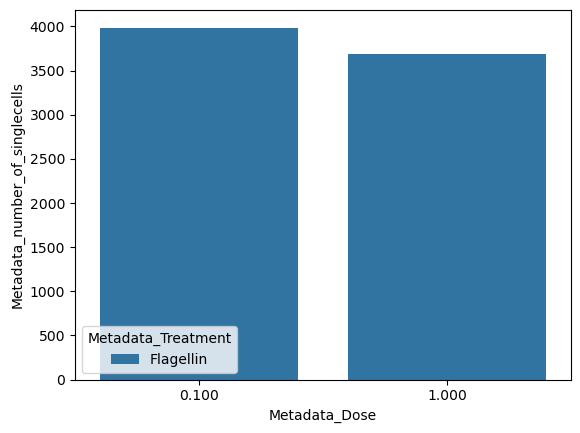

In [21]:
for i in df["Metadata_Treatment"].unique():
    tmp_df = df[df["Metadata_Treatment"] == i]
    sns.barplot(
        x="Metadata_Dose",
        y="Metadata_number_of_singlecells",
        hue="Metadata_Treatment",
        estimator=np.median,
        data=tmp_df,
        errorbar=("ci", 95),
    )
    plt.show()
    plt.close()